In [1]:
# import dataset
# from google.colab import files
# uploaded = files.upload()

In [2]:
# to chack the datasets are correctly uploaded and labeled.
import os
print(os.listdir(os.getcwd()))

['.config', '3.jpg', '1.jpg', '4.jpg', '2.jpg', 'sample_data']


In [3]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Data Cleaning and Storing

(598, 676, 3)
598 676 3


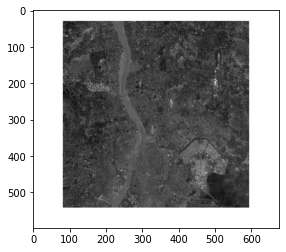

In [4]:
# investigate one input image
img = plt.imread('1.jpg')
plt.imshow(img)
a, b, c = img.shape
print(img.shape)
print(a, b, c)
# we have to delete this white border while taking input

In [5]:
# creating a feature vecotor with dim 512, 512, 4
# beacause, each sample is of 512*512 and 
# total 4 samples
X = np.zeros(shape=(512, 512, 4), dtype=np.int8)
# print(X)

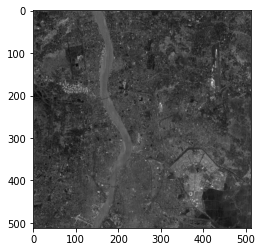

In [6]:
# zoom image to find the cliffed coordinate 
# of image of 512*512
img1  = img[28:540, 80:592]
plt.imshow(img1)

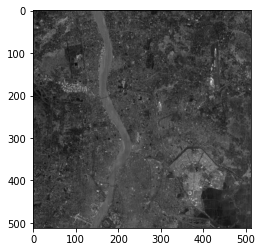

In [7]:
img1  = img[30:542, 82:594]
plt.imshow(img1)

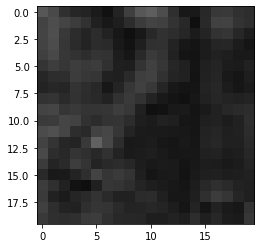

In [8]:
# magnify to see if white border
# cliffed correctly at edge
plt.imshow(img1[0:20, 0:20])

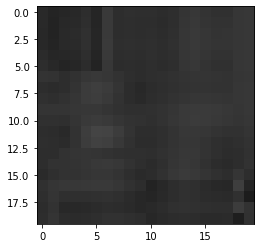

In [9]:
plt.imshow(img1[492:512, 492:512])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


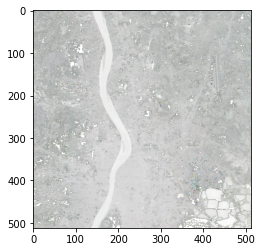

In [10]:
# storing input images to X
for i in range(4):
  ig = plt.imread(str(i+1)+'.jpg')[30:542, 82:594]
  print(ig.shape)
  # plt.imshow(ig)
  X[:, :, i] = np.array(ig[:, :, 0])

plt.imshow(X)
# X is our feature vector

# Covariance Matrix Calculation

## Step 1: Calculate mean of Bands
Calculate Mean : mean = [Mean1; Mean2; Mean3 ;Mean4]

*   Mean1 = mean of Rband image
*   Mean2 = mean of Gband Image
*   Mean3 = mean of Bband image
*   Mean4 = mean of Iband image

In [11]:
mean = [0]*4
# print(mean)

for i in range(4):
  for j in range(512):
    for k in range(512):
      mean[i] = mean[i] + X[j, k, i]

# print(mean)
for j in range(4):
  mean[j] = mean[j] / (512*512)
print(mean)

[64.50963973999023, 68.9995346069336, 64.45877456665039, 73.67737197875977]


## Step 2: Covariance mat
 Calculate the Covariance Matrix all samples which is 4 * 4
dimensions. Basically (X – T1) deviation and (Y – T1) deviation and multiply it and summing up
where X and Y represents all the sample points considered for training ( R, G, B and I band
image) we will get 2^4 = 16 values in the covariance matrix for possible combinations of 4 band
images. We are doing the deviation of sample points from the mean vector.
(Apply covariance matrix calculation formula)

In [12]:
cov = np.zeros(shape=(4, 4), dtype=np.float64) # covariance mat

dev = np.zeros(shape=(512, 512,4), dtype=np.float64) # deviation mat

for i in range(512):
  for j in range(512):
    dev[i][j] = np.subtract(X[i,j,:], mean)
# print(X)
# print(dev)

for i in range(4):
  for j in range(4):
    cov[i][j] = np.dot(dev[:, :, i].flatten(), dev[:, :, j].flatten()) / (512*512)

print(cov)

[[ 662.44080979  409.3051116   342.27360221   40.97107232]
 [ 409.3051116   562.31761911  364.79664601   64.00064331]
 [ 342.27360221  364.79664601  663.3658084    82.67744392]
 [  40.97107232   64.00064331   82.67744392 1277.25907415]]


# Eigen Vector and Eigen Value of the Covariance Matrix

In [13]:
# w for eigen values
# v for eigen vectors
w, v = np.linalg.eig(cov)

print(w.shape) # linear aarray
print("Eigen Value:")
print(w)
print("Eigen vectors:")
print(v)

(4,)
Eigen Value:
[1444.37090834 1208.42237295  187.93873689  324.65129327]
Eigen vectors:
[[ 0.49028831  0.34678567  0.5248105   0.60326695]
 [ 0.47056073  0.30183577 -0.81490217  0.15297783]
 [ 0.49224326  0.29259755  0.24580168 -0.78209001]
 [ 0.54395454 -0.8384638   0.00948294  0.03165419]]


# Principal Components :
  Apply Linear Transformation<br>
        $Y_{k}$ = $\sum_i^M$ $a_{ki}$ $X_{i}$ <br>
  where k = 1, ... , M no of features<br>
  $a_{ki}$ = transformation matrix<br>
  $X_{i}$ = Geature Vector

From Documentation:<br>
 **FinalData = RowFeatureVector * RowDataAdjust**<br>
where **RowFeatureVector**
is the matrix with the eigenvectors in the columns transposed so that the eigenvectors are now in the rows, and **RowDataAdjust** is the mean-adjusted data transposed, ie. the data
items are in each column, with each row holding a separate dimension.



In [14]:
Y = np.ndarray((512, 512, 4), dtype=np.int8)

# apply linear transformation using above formula
for i in range(512):
  for j in range(512):
    Y[i, j, :] = np.dot(v.T, dev[i, j, :])

# Final Outputs

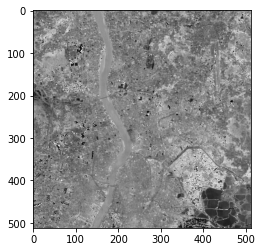

In [15]:
plt.imshow(Y[:, :, 0], cmap="gray")

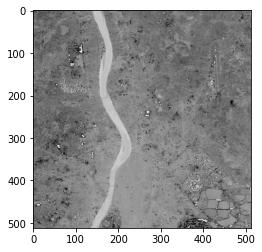

In [16]:
plt.imshow(Y[:, :, 1], cmap="gray")

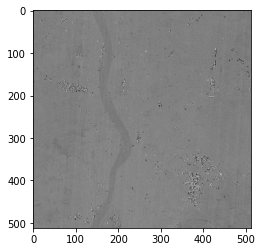

In [17]:
plt.imshow(Y[:, :, 2], cmap="gray")

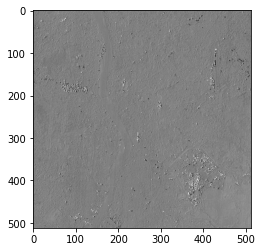

In [18]:
plt.imshow(Y[:, :, 3], cmap="gray")